# Homework 4 - Part 2
## Deep Learning Technologies
### Shruti Badrinarayanan - 016768141

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset Split : Train, Validation and Test

In [2]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Paths to the folders containing the images and labels
images_path = '/content/drive/MyDrive/Deep Learning/Assignments/Assignment 4/Part 2/Squid Bat Butterfly/train/images'
labels_path = '/content/drive/MyDrive/Deep Learning/Assignments/Assignment 4/Part 2/Squid Bat Butterfly/train/labels'

# List all images
images = os.listdir(images_path)

# Ensure the same random state for images and labels
random.seed(42)

# Select 20 images randomly
selected_images = random.sample(images, 20)

# Splitting the selected images into train, validation, and test sets
train_images, test_val_images = train_test_split(selected_images, test_size=0.2, random_state=42)
val_images, test_images = train_test_split(test_val_images, test_size=0.5, random_state=42)

# Base path for the split dataset directories
split_base_path = os.path.join('/content/drive/MyDrive/Deep Learning/Assignments/Assignment 4/Part 2/Squid Bat Butterfly/', 'split')

# Ensuring that the directories for train, val, and test sets exist for both images and labels
for set_name in ['train', 'val', 'test']:
    for content_type in ['images', 'labels']:
        set_path = os.path.join(split_base_path, set_name, content_type)
        os.makedirs(set_path, exist_ok=True)

# Function to move selected files (images and labels) to their respective set directories
def move_files(files, set_name):
    for filename in files:
        # Determine the file extension for labels assuming a pattern (e.g., .txt for labels)
        label_filename = os.path.splitext(filename)[0] + '.txt'

        # Paths for source and destination of images
        src_img_path = os.path.join(images_path, filename)
        dst_img_path = os.path.join(split_base_path, set_name, 'images', filename)

        # Paths for source and destination of labels
        src_label_path = os.path.join(labels_path, label_filename)
        dst_label_path = os.path.join(split_base_path, set_name, 'labels', label_filename)

        # Copy files
        shutil.copy(src_img_path, dst_img_path)
        if os.path.exists(src_label_path):  # Check if the label file exists
            shutil.copy(src_label_path, dst_label_path)

# Moving the files to their respective directories
move_files(train_images, 'train')
move_files(val_images, 'val')
move_files(test_images, 'test')

print("Dataset has been split into train, val, and test sets.")

Dataset has been split into train, val, and test sets.


# Imports and Setup

In [3]:
# !pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

# Training

In [5]:
%cd /content/drive/MyDrive/Deep Learning/Assignments/Assignment 4/Part 2/Squid Bat Butterfly
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/Deep Learning/Assignments/Assignment 4/Part 2/Squid Bat Butterfly
New https://pypi.org/project/ultralytics/8.1.19 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, s

In [6]:
!ls runs/detect/train/

args.yaml					     P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			     PR_curve.png      train_batch90.jpg
confusion_matrix.png				     R_curve.png       train_batch91.jpg
events.out.tfevents.1709149535.9494d308670b.14747.0  results.csv       train_batch92.jpg
F1_curve.png					     results.png       val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					     train_batch1.jpg  weights


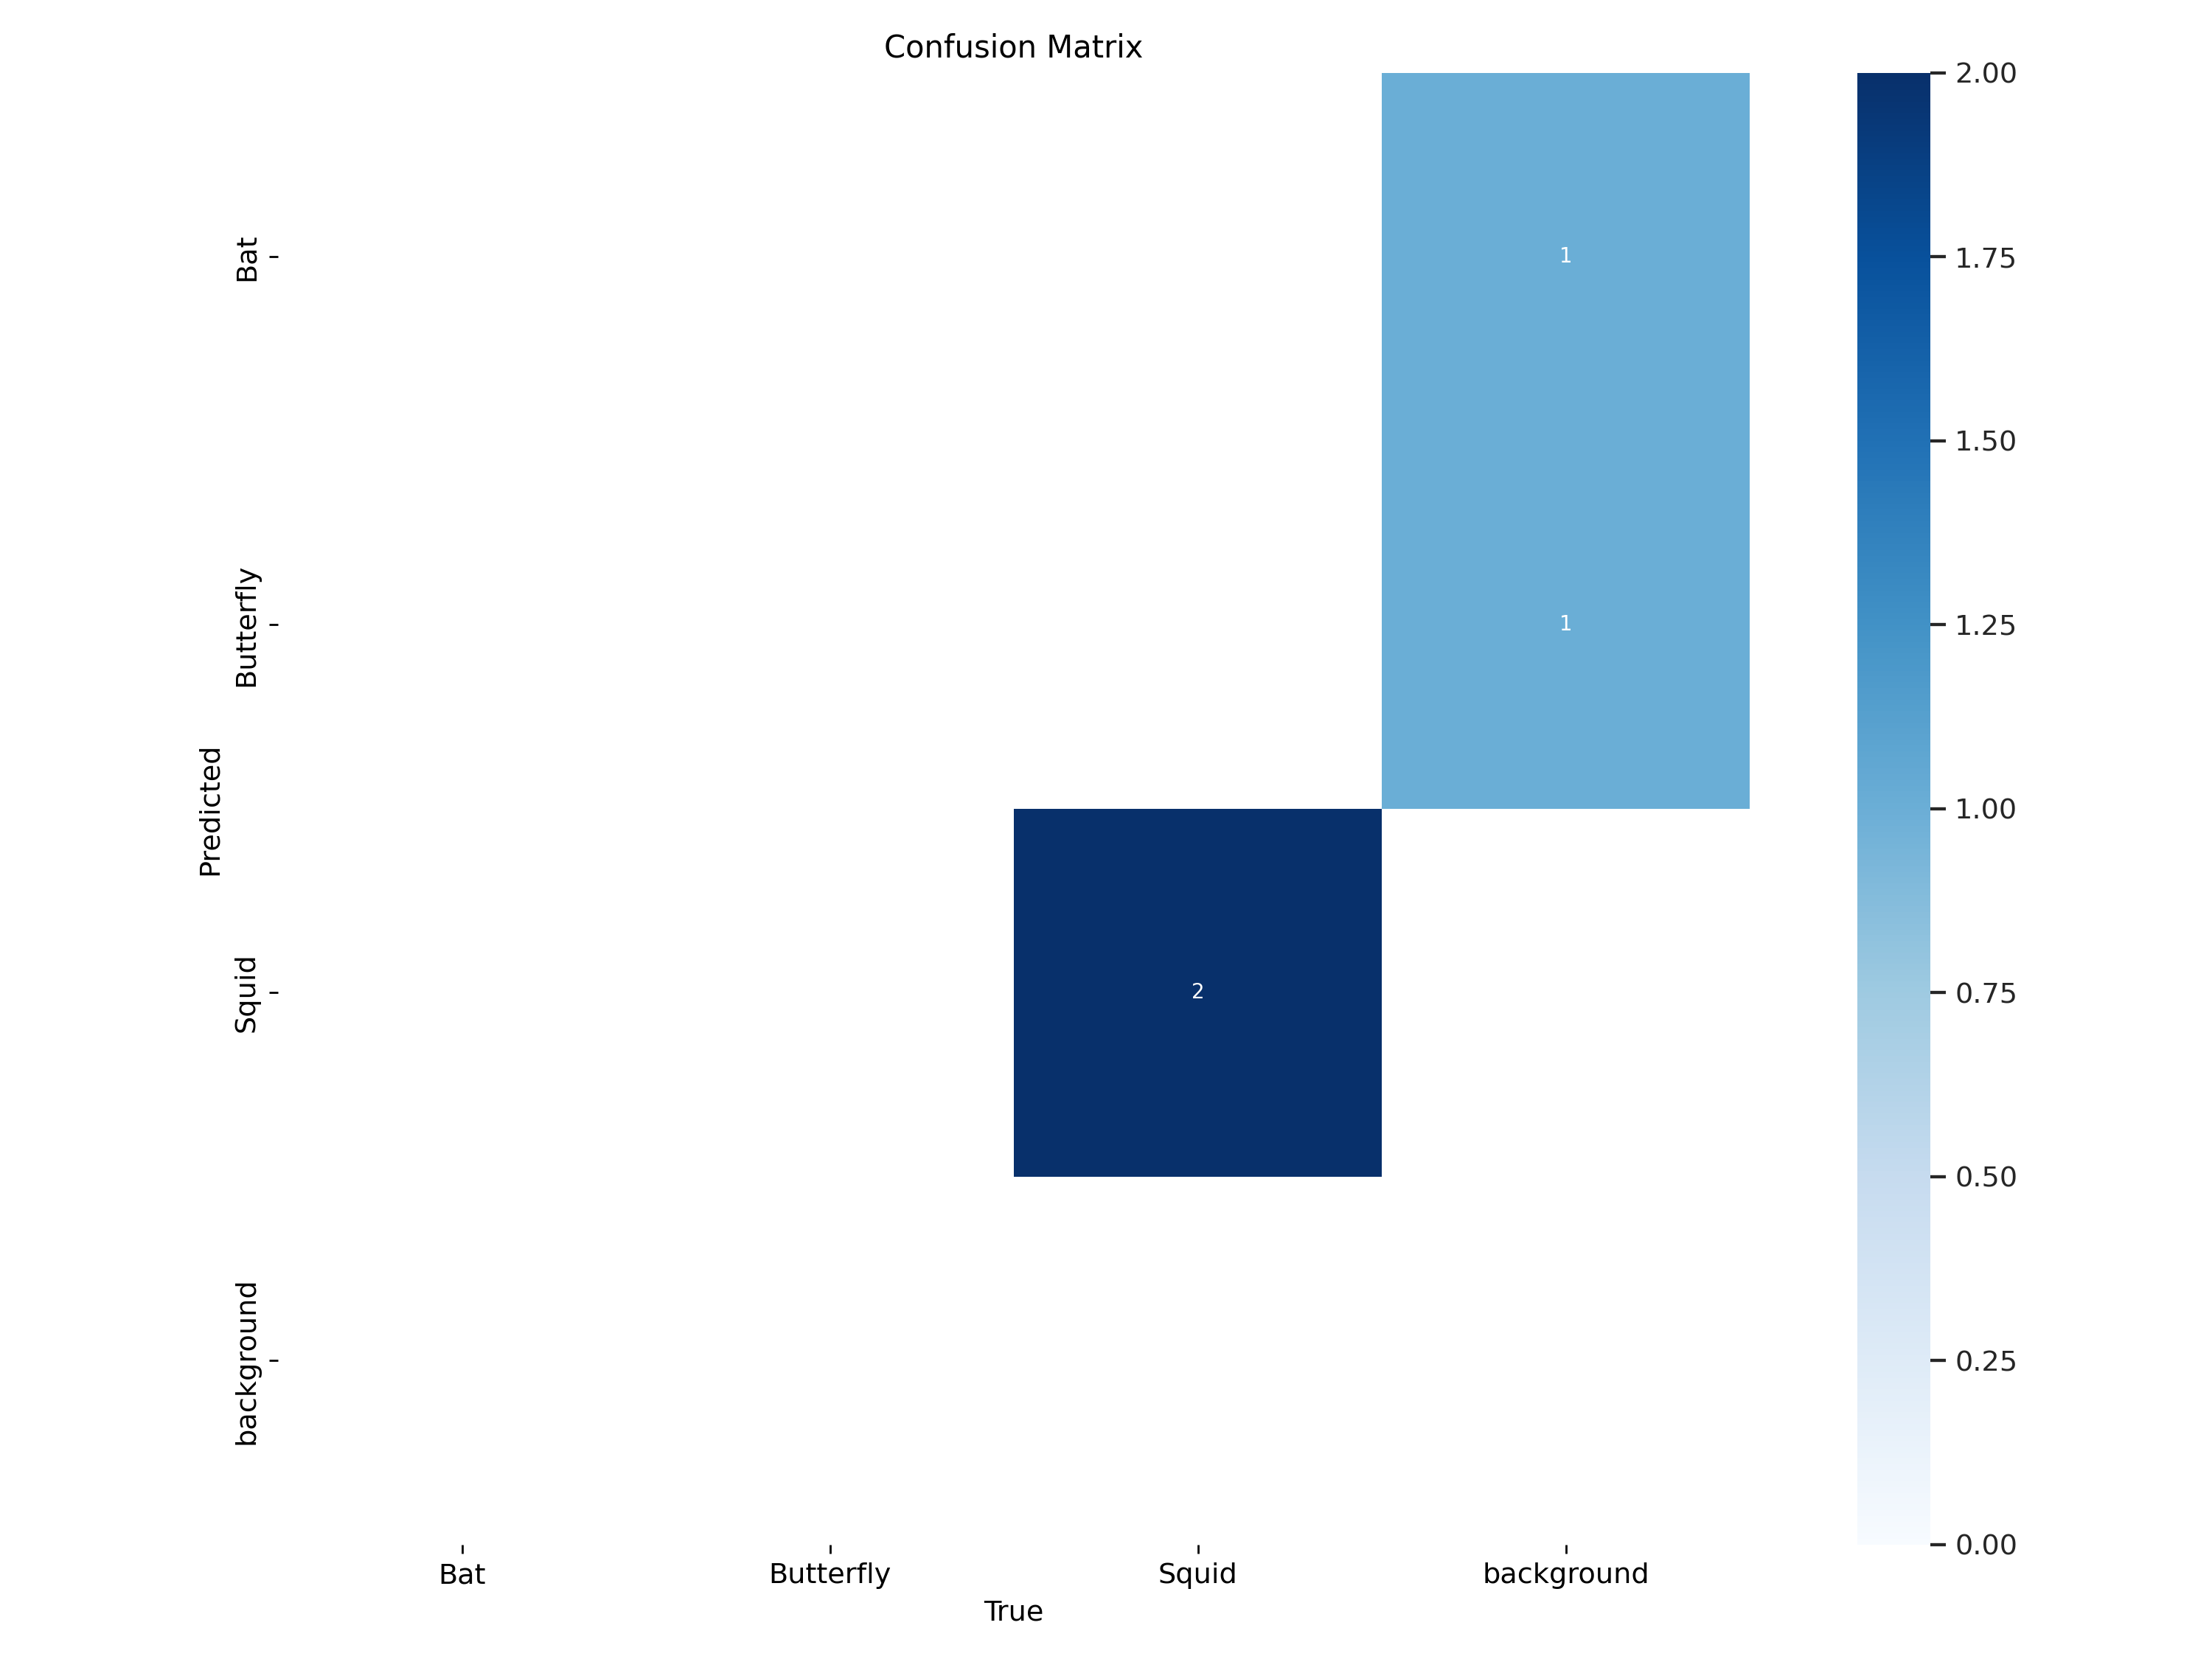

In [7]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

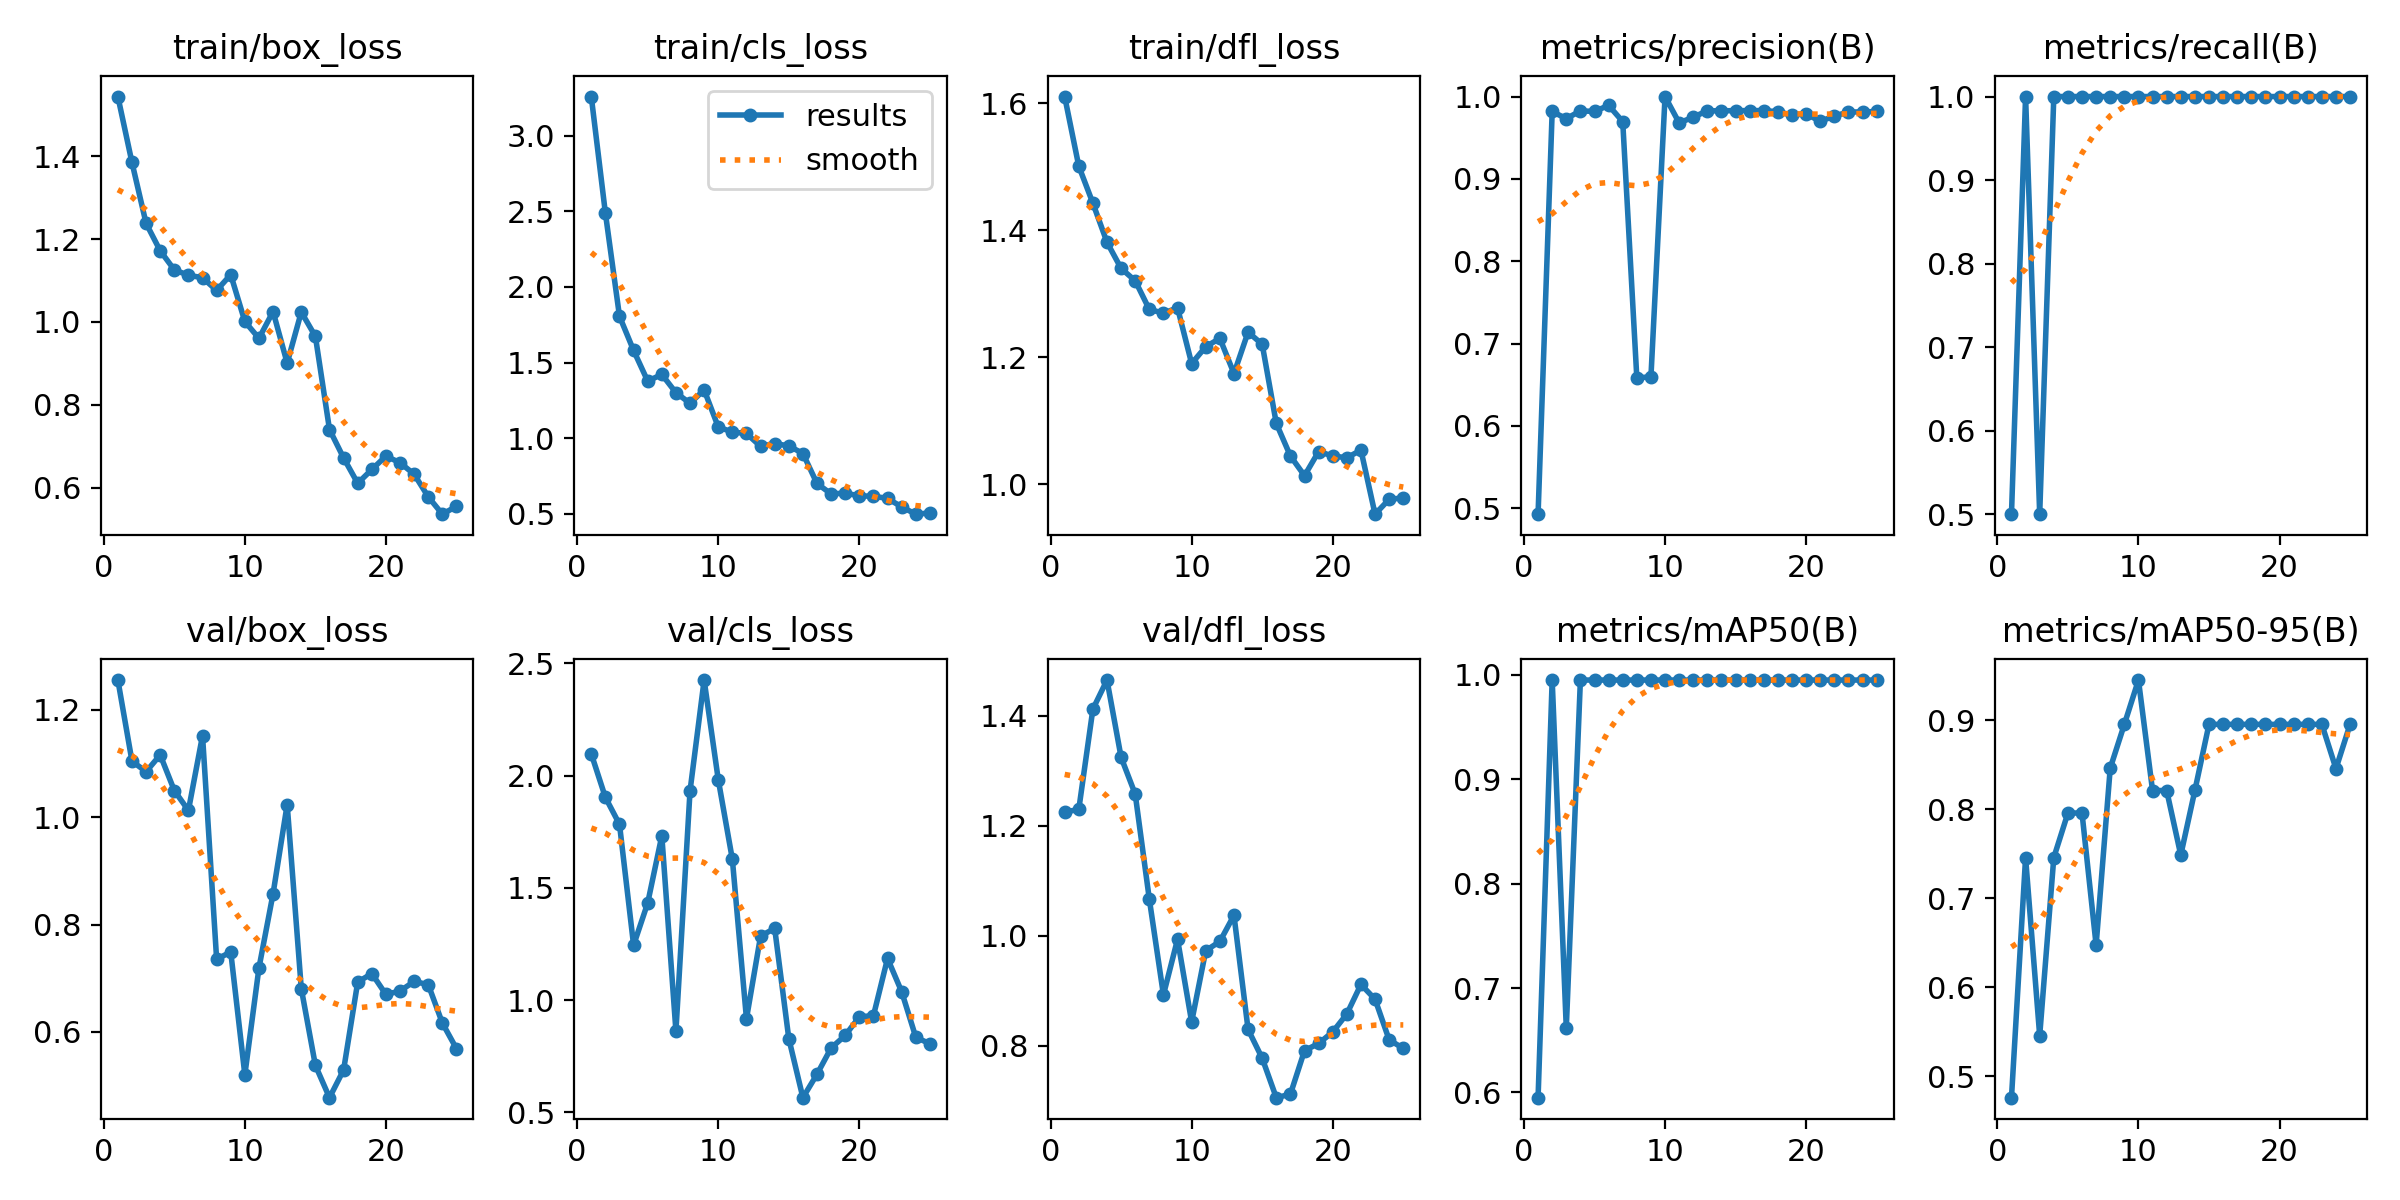

In [8]:
Image(filename='runs/detect/train/results.png', width=600)

# Validation of the Custom Model

In [10]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Deep Learning/Assignments/Assignment 4/Part 2/Squid Bat Butterfly/split/val/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100% 2/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.30it/s]
                   all          2          2      0.981          1      0.995      0.945
                 Squid          2          2      0.981          1      0.995      0.945
Speed: 0.3ms preprocess, 65.9ms inference, 0.0ms loss, 285.3ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


# Inference with Custom Model

In [13]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/Deep Learning/Assignments/Assignment 4/Part 2/Squid Bat Butterfly/split/test/images'

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/2 /content/drive/MyDrive/Deep Learning/Assignments/Assignment 4/Part 2/Squid Bat Butterfly/split/test/images/01_jpg.rf.59b75c6f4528f203f6277cd01f2dcec3.jpg: 224x224 1 Butterfly, 1 Squid, 10.0ms
image 2/2 /content/drive/MyDrive/Deep Learning/Assignments/Assignment 4/Part 2/Squid Bat Butterfly/split/test/images/54_jpg.rf.cf030dd4c4a0f3c1d854683654b345ae.jpg: 224x224 1 Squid, 7.3ms
Speed: 0.8ms preprocess, 8.7ms inference, 257.6ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


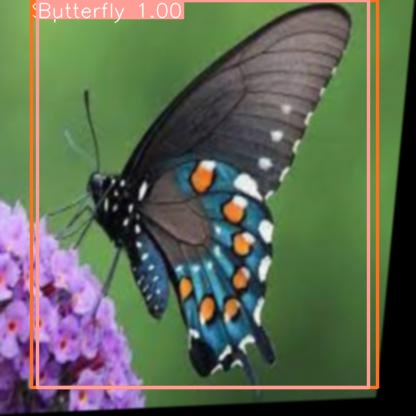

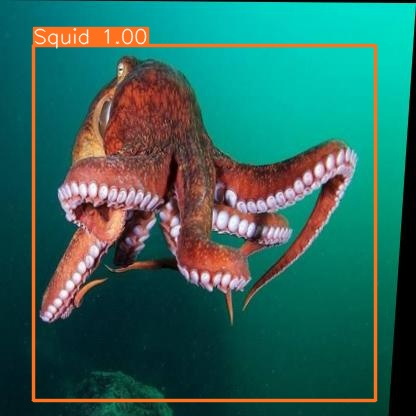

In [18]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=300))
      print("\n")